## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [12]:

import jupyter as jp
import pandas as pd
import matplotlib.pyplot as plt
print( pd.read_csv('./assets/real_estate.csv', on_bad_lines="skip"))


      ;"id_realEstates";"isNew";"realEstate_name";"phone_realEstate";"url_inmueble";"rooms";"bathrooms";"surface";"price";"date";"description";"address";"country";"level1";"level2";"level3";"level4";"level5";"level6";"level7";"level8";"upperLevel";"countryId";"level1Id";"level2Id";"level3Id";"level4Id";"level5Id";"level6Id";"level7Id";"level8Id";"accuracy";"latitude";"longitude";"zipCode";"customZone"
0      1;153771986;FALSE;"ferrari 57 inmobiliaria";"9...                                                                                                                                                                                                                                                                                                                                                            
1      El precio de la vivienda incluye garaje y tras...                                                                                                                                      

#### What is the most expensive home in the dataset? (★☆☆)

In [6]:
data_frame = pd.read_csv('./assets/real_estate.csv', sep=";")
column = data_frame ['price']
caro_index = column.idxmax()
print(f"The id of the most expensive home is {caro_index}")



NameError: name 'pd' is not defined

#### What is cheapest home in the dataset? (★☆☆)

In [3]:
barato_index = column.idxmin()
print(f"The id of the most cheapest home is {barato_index}")

The id of the most cheapest home is 366


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [4]:
column = data_frame ['surface']
grande_index = column.idxmax()
grande = column.max()
chico_index = column.idxmin()
chico = column.min()

print(f"The id of the biggest home is {grande_index}")
print()
print(f"The id of the smallest home is {chico_index}")



The id of the biggest home is 6794

The id of the smallest home is 498


#### How many populations (level5) the dataset contains? (★☆☆)

In [5]:
column = data_frame["level5"]
print(column.unique().size)

168


#### Does the dataset contain NAs? (★☆☆)


In [6]:
print(data_frame.isnull().values.any())


True


#### Delete the NAs of the dataset, if applicable (★★☆)

In [7]:
if data_frame.isnull().values.any():
    stripped_data_frame = data_frame.dropna()
    print(stripped_data_frame)
else:
    print(data_frame)


# está bien borrar si el dato es null? tendría que hacer algún otro control, verdad?
#     

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [14]:
filtro_datos_frame = data_frame[data_frame['level5'] == "Arroyomolinos (Madrid)"]
print(round(filtro_datos_frame['price'].mean()))

294542


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

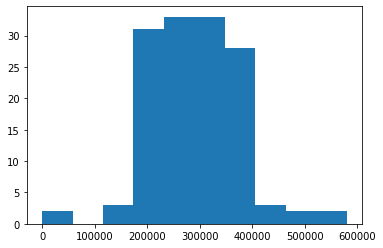

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
data_frame = pd.read_csv('./assets/real_estate.csv', sep=";")
filtro_datos_frame = data_frame[data_frame['level5'] == "Arroyomolinos (Madrid)"]
plt.hist(filtro_datos_frame['price'])
plt.show()

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [9]:
filtro_datos_frame = data_frame[data_frame['level5'].isin(("Fuenlabrada", "Leganés", "Getafe", "Alcorcón"))]
print(filtro_datos_frame)


       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Make a bar plot of the median of prices (★★★) 

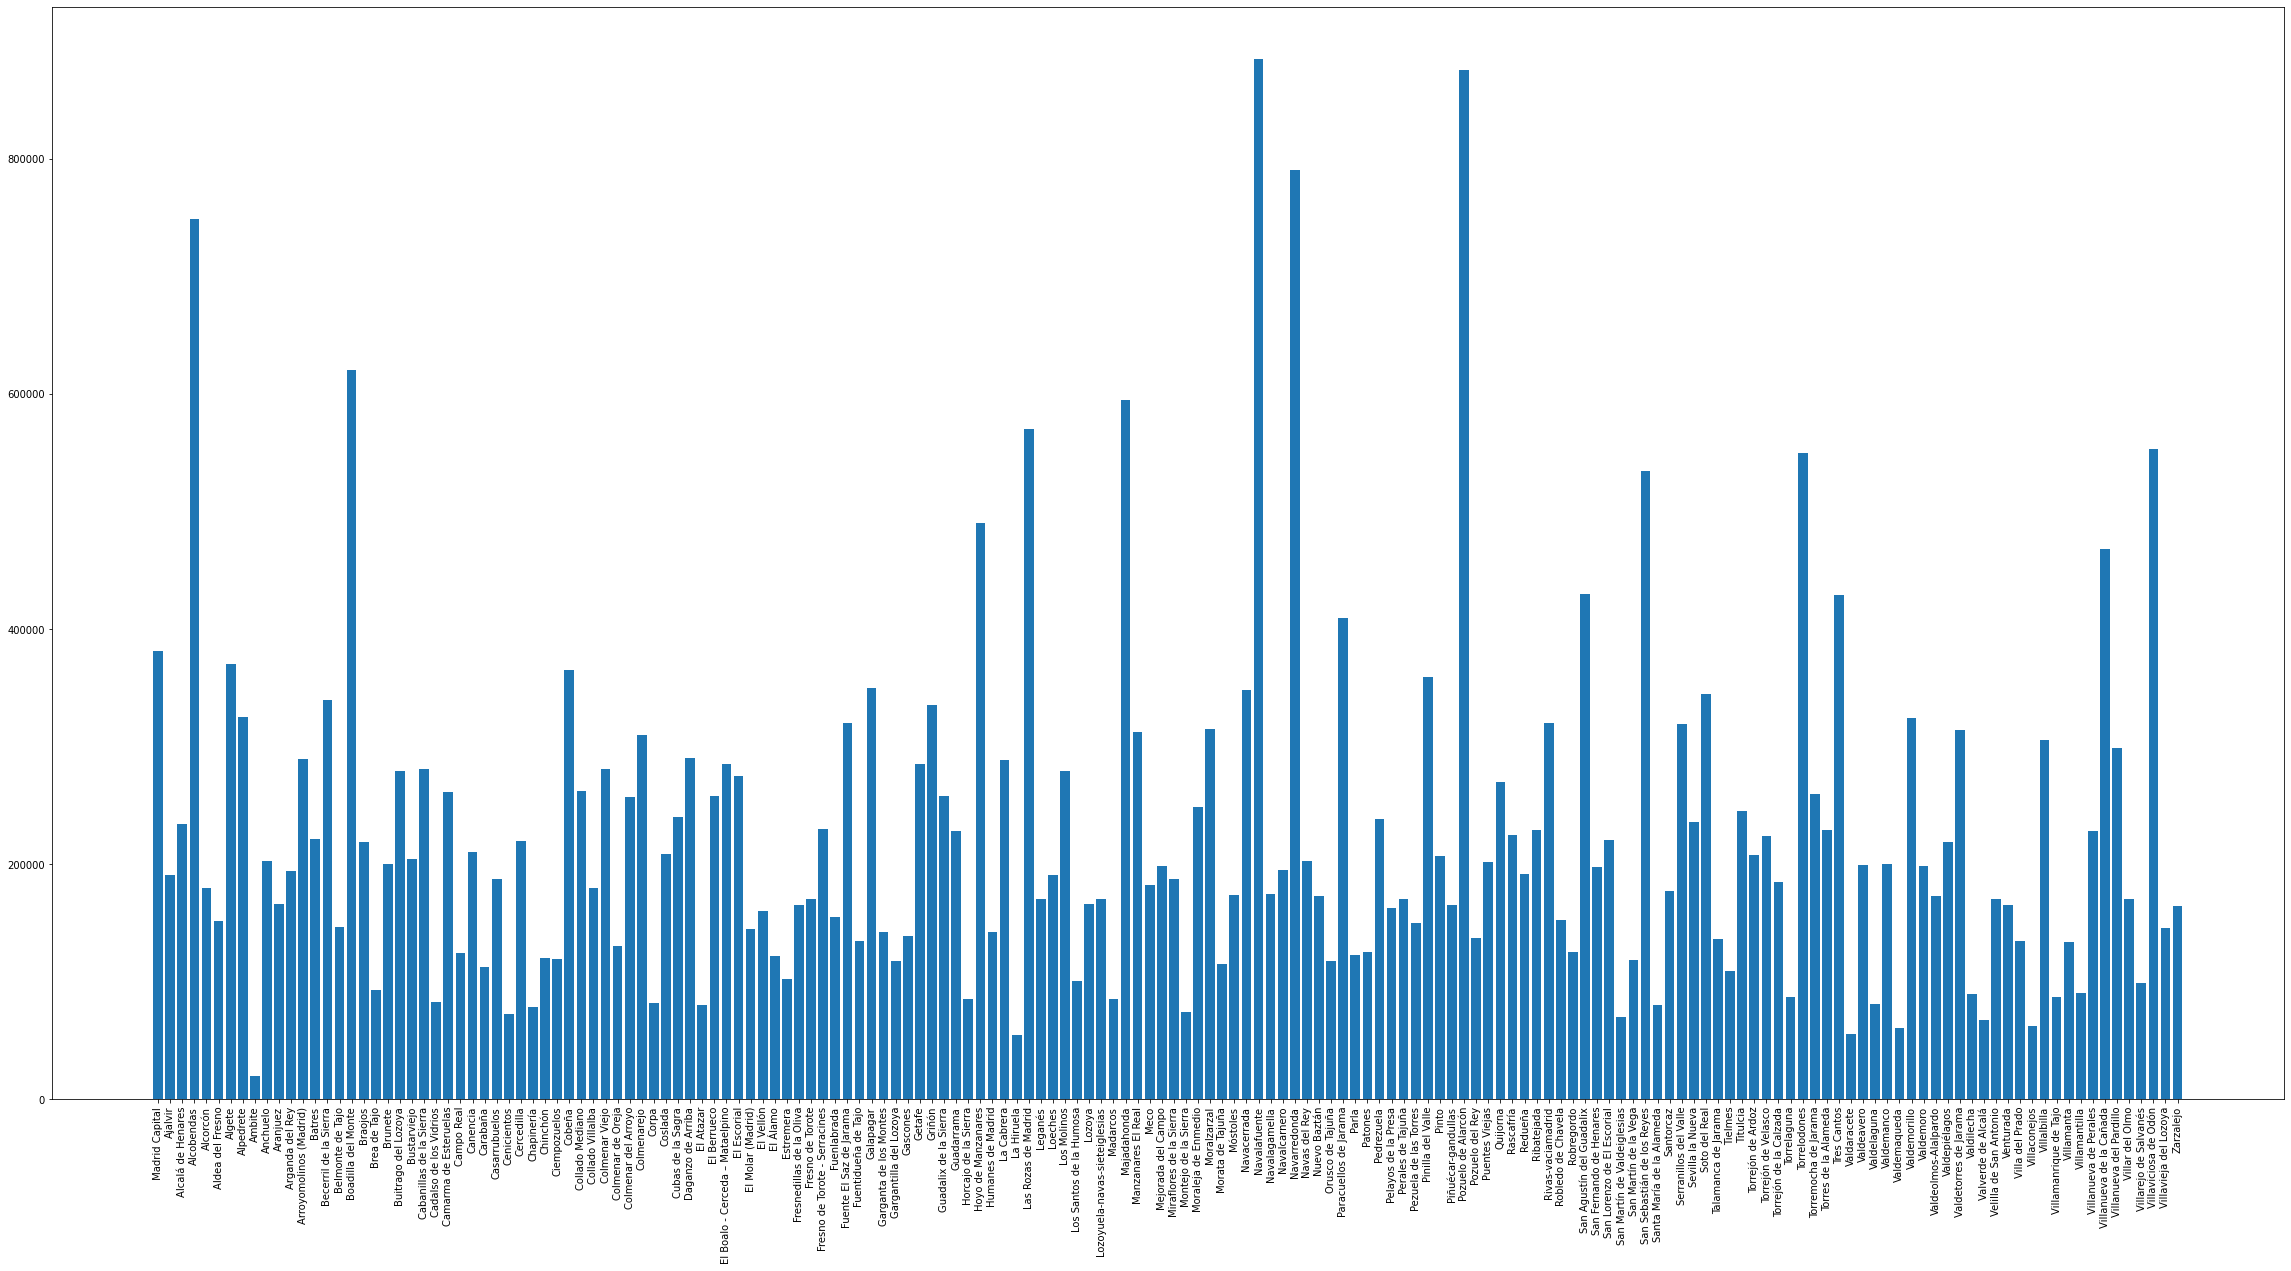

In [12]:

filtro_datos_frame = data_frame[['level5', 'price']]
grouped_filtro_datos_frame = filtro_datos_frame.groupby('level5')['price'].median().reset_index()
keys = grouped_filtro_datos_frame['level5'].tolist()
values = grouped_filtro_datos_frame['price'].tolist()

plt.bar(keys, values)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (30,20.1)
plt.show()






#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [14]:
filtro_datos_frame = data_frame[data_frame['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtro_datos_frame = filtro_datos_frame[['level5', 'price', 'rooms', 'surface', 'bathrooms']]
grouped_filtro_datos_frame = filtro_datos_frame.groupby('level5')
print("Mean of the requested variables")
print(grouped_filtro_datos_frame.mean())
print()
print()
print("Variance of the requested variables")
print(grouped_filtro_datos_frame.var())


Mean of the requested variables
                     price     rooms     surface  bathrooms
level5                                                     
Alcorcón     230071.052632  2.914894  105.913295   1.623656
Fuenlabrada  177198.021459  3.025974  103.624365   1.445415
Getafe       265040.500000  3.151724  126.896266   1.865052
Leganés      208682.010309  2.906736  105.852273   1.518135


Variance of the requested variables
                    price     rooms      surface  bathrooms
level5                                                     
Alcorcón     1.594783e+10  0.933895  4244.323834   0.592735
Fuenlabrada  4.701021e+09  0.355844  2264.643893   0.353367
Getafe       2.098267e+10  0.772748  5828.110028   0.658809
Leganés      1.191394e+10  0.824590  3987.475195   0.553055


#### What is the most expensive home of each population? (★★☆) 

In [15]:
def get_population_most_expensive_home_data(population_data_frame: pd.DataFrame):
    result = {
        "most_expensive_home": {
            "id": population_data_frame['price'].idxmax(), 
            "price": population_data_frame['price'].max()
        }
    }
    return result

populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
filtro_datos_frame = data_frame[data_frame['level5'].isin(populations_to_filter)]
filtro_datos_frame = filtro_datos_frame[['level5', 'price']]
population_specific_data_frames = [filtro_datos_frame[filtro_datos_frame['level5'] == population] for population in populations_to_filter]
most_expensive_homes_dict = {
    population_data_frame['level5'].iloc[0]: get_population_most_expensive_home_data(population_data_frame=population_data_frame) 
    for population_data_frame in population_specific_data_frames
}
print(most_expensive_homes_dict)

{'Fuenlabrada': {'most_expensive_home': {'id': 11561, 'price': 490000}}, 'Leganés': {'most_expensive_home': {'id': 10412, 'price': 650000}}, 'Getafe': {'most_expensive_home': {'id': 2881, 'price': 1050000}}, 'Alcorcón': {'most_expensive_home': {'id': 5585, 'price': 950000}}}


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

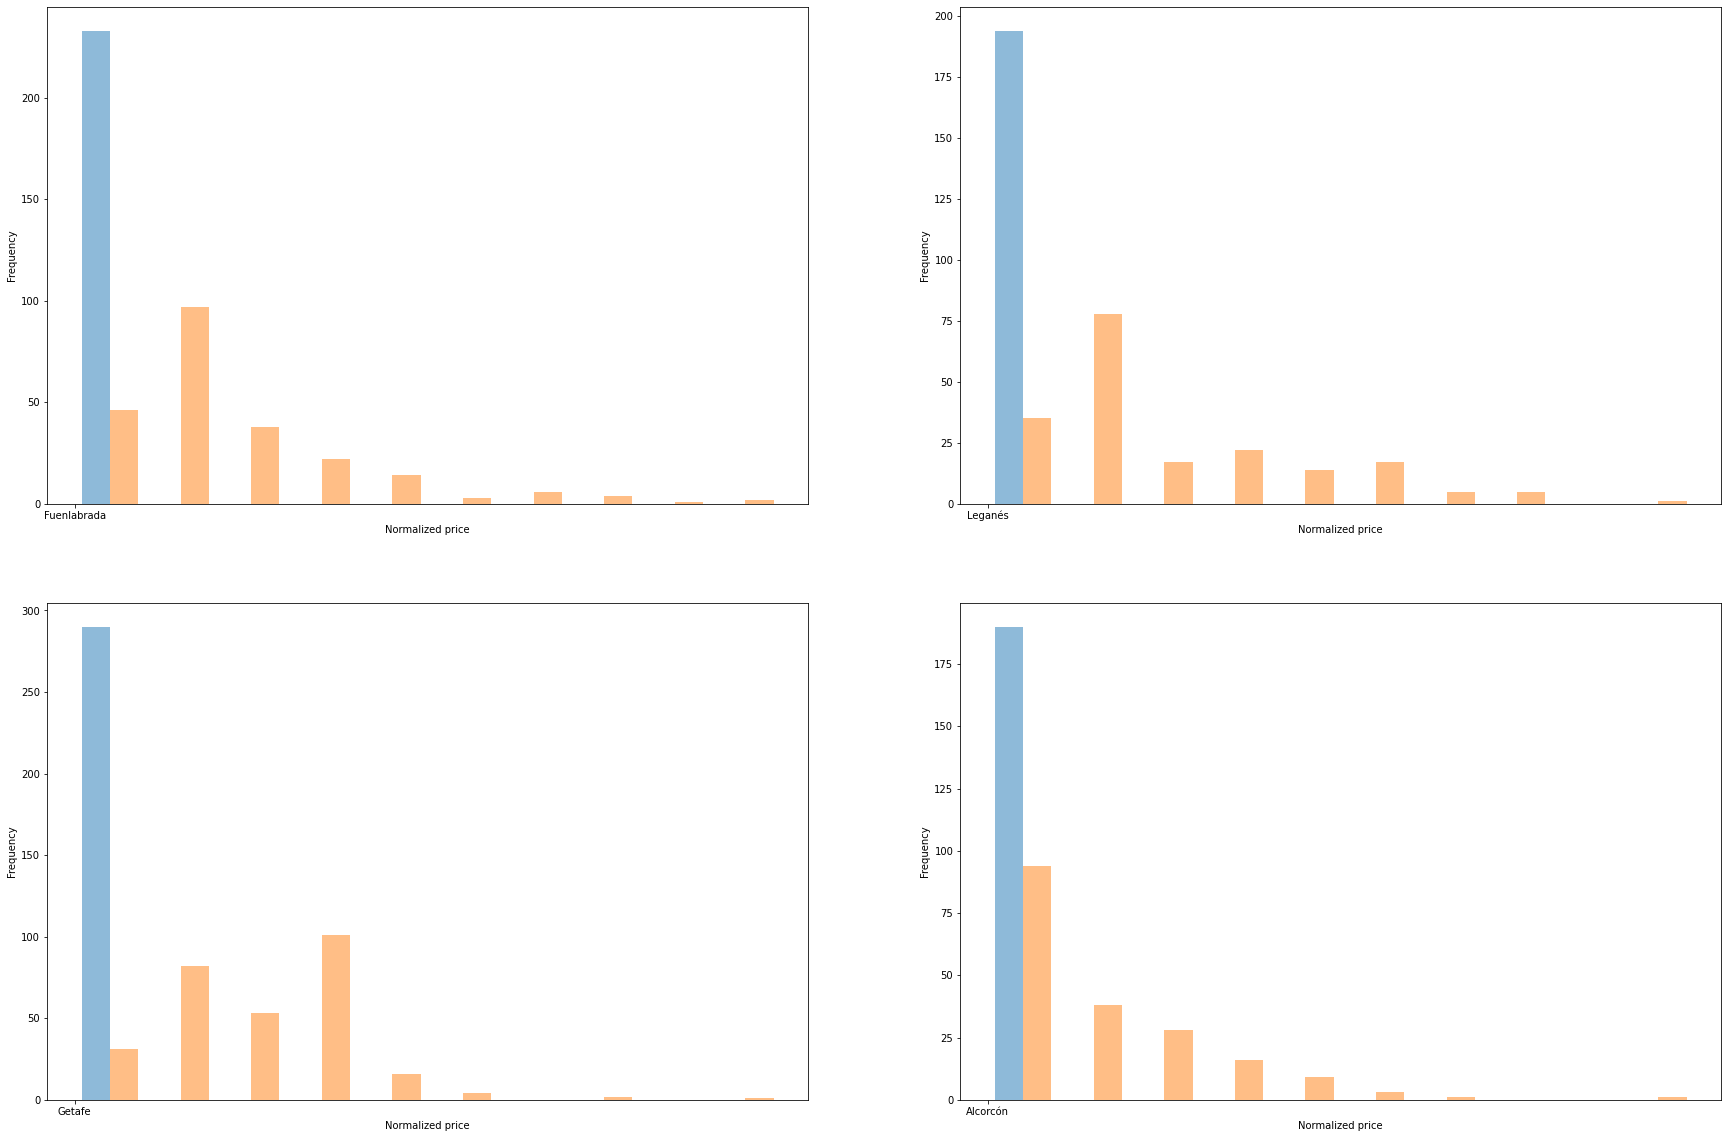

In [16]:
def normalize_price(data_frame: pd.DataFrame) -> pd.DataFrame:
    column = 'price'
    new_data_frame = data_frame.copy() 
    new_data_frame[column] = (data_frame[column] - data_frame[column].min()) / (data_frame[column].max() - data_frame[column].min())
    #preguntar en mentoría
    return new_data_frame

populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
filtro_datos_frame = data_frame[data_frame['level5'].isin(populations_to_filter)]
filtro_datos_frame = filtro_datos_frame[['level5', 'price']]
population_specific_data_frames = [filtro_datos_frame[filtro_datos_frame['level5'] == population] for population in populations_to_filter]
population_specific_data_frames = [normalize_price(data_frame) for data_frame in population_specific_data_frames]

for index, population_data_frame in enumerate(population_specific_data_frames):
    plt.subplot(2, 2, index + 1)
    plt.xlabel('Normalized price')
    plt.ylabel('Frequency')
    plt.hist(population_data_frame, alpha=0.5, label=population_data_frame['level5'].iloc[0])

plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [37]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps, Marker
import pandas as pd

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)

data_frame = pd.read_csv('./assets/real_estate.csv', sep=';')
filtro_datos_frame = data_frame[['level5', 'latitude', 'longitude']]
populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
colors = ('blue', 'yellow', 'red', 'green')
population_data_frames_dict = {population: filtro_datos_frame[filtro_datos_frame['level5'] == population].dropna() for population in populations_to_filter}

for population in populations_to_filter:
    population_data_frame = population_data_frames_dict[population]
    for index in range(len(population_data_frame)):
        location = (population_data_frame.iloc[index]['latitude'], population_data_frame.iloc[index]['longitude'])
        marker = Marker(location=location, draggable=False, color=colors[populations_to_filter.index(population)])
        map.add_layer(marker)

map




Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [18]:

def get_price_per_square_meter_info(data_frame: pd.DataFrame):
    return {
        'price_per_square_meter': {
                'average': data_frame['price_per_square_meter'].mean(),
                'median': data_frame['price_per_square_meter'].median(),
        }
    }
filtro_datos_frame = data_frame[['level5', 'price', 'surface']]
populations_to_filter = ('Getafe', 'Alcorcón')
population_data_frames_dict = {population: filtro_datos_frame[filtro_datos_frame['level5'] == population].dropna() for population in populations_to_filter}
price_per_square_meter_info_dict = {}
for population in population_data_frames_dict:
    population_data_frames_dict[population]['price_per_square_meter'] = filtro_datos_frame['price'] / filtro_datos_frame['surface']
    price_per_square_meter_info = get_price_per_square_meter_info(data_frame=population_data_frames_dict[population])
    price_per_square_meter_info_dict[population] = price_per_square_meter_info

print(price_per_square_meter_info_dict)

{'Getafe': {'price_per_square_meter': {'average': 2066.314949251463, 'median': 1973.3333333333333}}, 'Alcorcón': {'price_per_square_meter': {'average': 2239.302480199618, 'median': 2207.7922077922076}}}


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [22]:
filtro_datos_frame = data_frame[['level5', 'price']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_data_frames_dict = {population: filtro_datos_frame[filtro_datos_frame['level5'] == population].dropna() for population in populations_to_filter}
valdemorillo_average_price = population_data_frames_dict[populations_to_filter[0]]['price'].mean()
galapagar_average_price = population_data_frames_dict[populations_to_filter[1]]['price'].mean()
print()
print(f"{populations_to_filter[0]} has an average price of {valdemorillo_average_price}")
print()
print(f"{populations_to_filter[1]} has an average price of {galapagar_average_price}")

if valdemorillo_average_price == galapagar_average_price:
    print("Yes, the average price is the same")
else:
    print("No, the average price is NOT the same")



Valdemorillo has an average price of 363860.2931034483

Galapagar has an average price of 360063.20238095237
No, the average price is NOT the same


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [29]:
filtro_datos_frame = data_frame[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_data_frames_dict = {population: filtro_datos_frame[filtro_datos_frame['level5'] == population].dropna() for population in populations_to_filter}
for population in population_data_frames_dict:
    population_data_frames_dict[population]['price_per_square_meter'] = filtro_datos_frame['price'] / filtro_datos_frame['surface']

valdemorillo_average_price_per_square_meter = population_data_frames_dict[populations_to_filter[0]]['price_per_square_meter'].mean()
galapagar_average_price_per_square_meter = population_data_frames_dict[populations_to_filter[1]]['price_per_square_meter'].mean()

print()
print(f"{populations_to_filter[0]} has an average price per square meter of {valdemorillo_average_price_per_square_meter}")
print(f"{populations_to_filter[1]} has an average price per square meter of {galapagar_average_price_per_square_meter}")
if valdemorillo_average_price_per_square_meter == galapagar_average_price_per_square_meter:
    print("Yes, both have the same average price per square meter")
else:
    print("No, their average price per square meter is NOT the same")
print()



Valdemorillo has an average price per square meter of 1317.9502109024984
Galapagar has an average price per square meter of 1606.3240303094024
No, their average price per square meter is NOT the same



#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

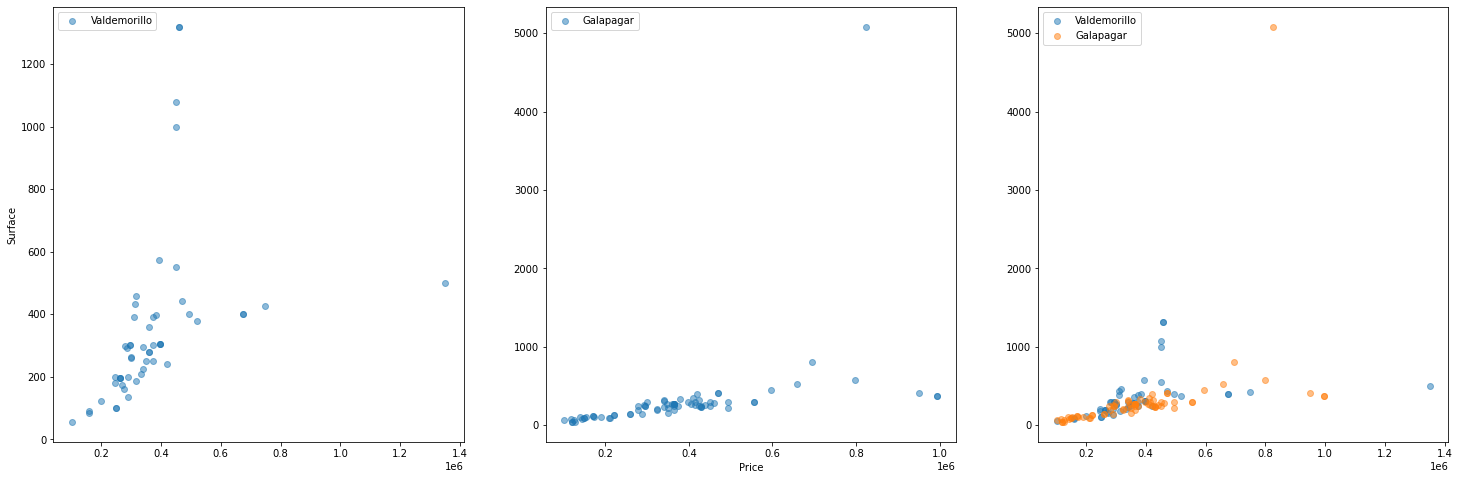

In [28]:
filtro_datos_frame = data_frame[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_data_frames_dict = {population: filtro_datos_frame[filtro_datos_frame['level5'] == population].dropna() for population in populations_to_filter}

plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
plt.ylabel('Surface')
plt.scatter(population_data_frames_dict[populations_to_filter[0]]['price'], population_data_frames_dict[populations_to_filter[0]]['surface'], alpha=0.5, label=populations_to_filter[0])
plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.scatter(population_data_frames_dict[populations_to_filter[1]]['price'], population_data_frames_dict[populations_to_filter[1]]['surface'], alpha=0.5, label=populations_to_filter[1])
plt.legend(loc='upper left')
plt.xlabel('Price')
plt.subplot(1, 3, 3)
plt.scatter(population_data_frames_dict[populations_to_filter[0]]['price'], population_data_frames_dict[populations_to_filter[0]]['surface'], alpha=0.5, label=populations_to_filter[0])
plt.scatter(population_data_frames_dict[populations_to_filter[1]]['price'], population_data_frames_dict[populations_to_filter[1]]['surface'], alpha=0.5, label=populations_to_filter[1])
plt.legend(loc='upper left')
plt.show()


#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

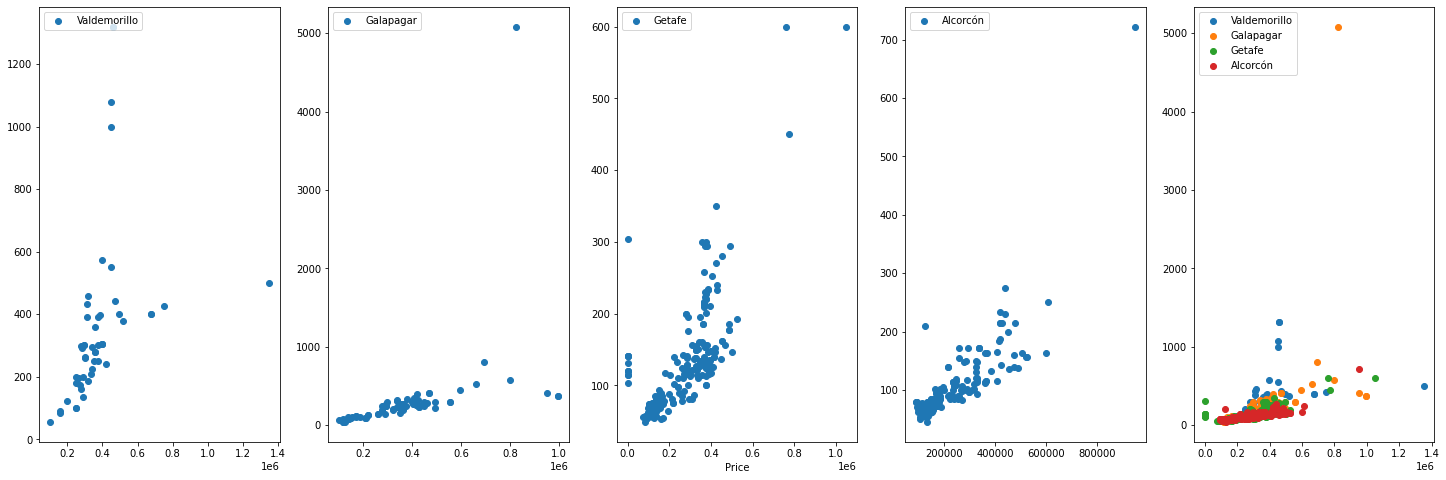

In [27]:
filtro_datos_frame = data_frame[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar', 'Getafe', 'Alcorcón')
population_data_frames_dict = {population: filtro_datos_frame[filtro_datos_frame['level5'] == population].dropna() for population in populations_to_filter}

plt.figure(figsize=(25, 8))
plt.ylabel('Surface')

for index, population in enumerate(populations_to_filter):
    plt.subplot(1, 5, index + 1)
    plt.scatter(population_data_frames_dict[populations_to_filter[index]]['price'], population_data_frames_dict[populations_to_filter[index]]['surface'], label=populations_to_filter[index])
    plt.legend(loc='upper left')
    plt.subplot(1, 5, 5)
    plt.scatter(population_data_frames_dict[populations_to_filter[index]]['price'], population_data_frames_dict[populations_to_filter[index]]['surface'], label=populations_to_filter[index])

plt.subplot(1, 5, 5)
plt.legend(loc='upper left')
plt.subplot(1, 5, 3)
plt.xlabel('Price')
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [25]:
grouped_filtered_data_frame = data_frame.groupby(['id_realEstates'])
grouped_filtered_data_frame = grouped_filtered_data_frame['id_realEstates']
print(len(grouped_filtered_data_frame.size()))

14217


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [26]:
grouped_filtered_data_frame = data_frame.groupby(['level5'])
houses_per_population = grouped_filtered_data_frame['level5'].count()
print(houses_per_population.idxmax())

 Madrid Capital
